In [9]:
!pip install sktime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.7/36.7 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.4/137.4 kB 12.8 MB/s eta 0:00:00


In [25]:
!pip install dask

In [16]:
import pandas as pd
from sktime.utils.plotting import plot_series
df = pd.read_csv('https://raw.githubusercontent.com/Alenushka2013/Coursera/refs/heads/master/Datasets/Tesla.csv')

In [17]:
df

,Date,Open,High,Low,Close,Volume
0,07/18/2023,290.15,295.26,286.01,293.34,112434703
1,07/17/2023,286.63,292.23,283.57,290.38,131569594
2,07/14/2023,277.01,285.30,276.31,281.38,120062398
3,07/13/2023,274000.32,279.45,270.60,277.90,112681508
4,07/12/2023,276.33,276.52,271.46,271.99,95672141
5,07/11/2023,268.65,270.90,266.37,269.79,91972359
6,07/10/2023,276.47,277.52,265.10,269.61,119425398
7,07/07/2023,278.43,280.78,273.77,274.43,113879203
8,07/06/2023,278.09,279.97,272.88,276.54,120707398
9,07/05/2023,278.82,283.85,277.60,282.48,131530891


In [18]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64


In [19]:
#Заміна типу object на datetime
df['Date'] = pd.to_datetime(df['Date'], format = "%m/%d/%Y")

In [20]:
df.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64


In [21]:
# Зміна індексів на дату
df = df.set_index("Date")

In [22]:
df.index

DatetimeIndex(['2023-07-18', '2023-07-17', '2023-07-14', '2023-07-13',
               '2023-07-12', '2023-07-11', '2023-07-10', '2023-07-07',
               '2023-07-06', '2023-07-05', '2023-07-03', '2023-06-30',
               '2023-06-29', '2023-06-28', '2023-06-27', '2023-06-26',
               '2023-06-23', '2023-06-22', '2023-06-21', '2023-06-20'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [23]:
# Для побудови графіку потрібно відсортувати дату за зростанням
df.sort_index(inplace = True)

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Open'>)

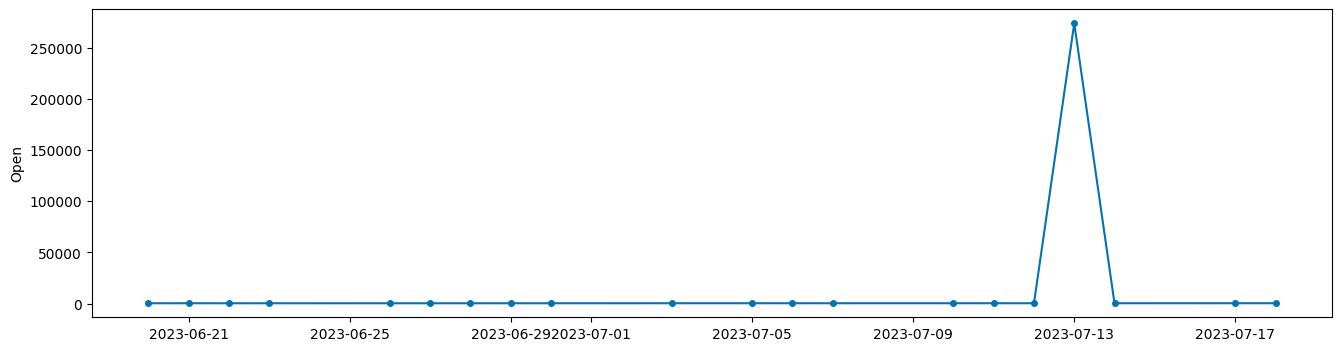

In [26]:
plot_series(df['Open'])

In [27]:
# Одне із значень значно більше за інші
# Виконаємо перевірку  Open не може бути більше ніж High
df[df.Open >= df.High]

,Open,High,Low,Close,Volume
2023-07-13,274000.32,279.45,270.6,277.9,112681508


In [32]:
# Схоже на зайві нулі, тому поділимо
# значення на 1000
df.loc[df.Open >= df.High, 'Open']/=1000

In [33]:
df

,Open,High,Low,Close,Volume
2023-06-20,261.50000,274.75,261.12,274.45,165611203
2023-06-21,275.13000,276.99,257.78,259.46,211797109
2023-06-22,250.77000,265.00,248.25,264.61,166875906
2023-06-23,259.29000,262.45,252.80,256.60,177460797
2023-06-26,250.07000,258.37,240.70,241.05,179990594
2023-06-27,243.24000,250.39,240.85,250.21,164968188
2023-06-28,249.70000,259.88,248.89,256.24,159770797
2023-06-29,258.03000,260.74,253.61,257.50,131283406
2023-06-30,260.60000,264.45,259.89,261.77,112620797
2023-07-03,276.49000,284.25,275.11,279.82,118999000


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Open'>)

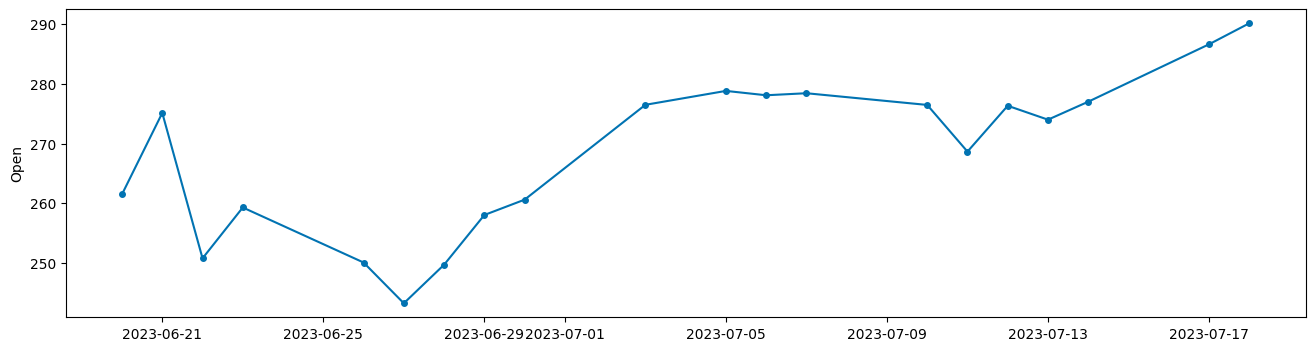

In [34]:
plot_series(df['Open'])